<a href="https://colab.research.google.com/github/muhammadahmad62/ML_Labs/blob/main/Lab01_293884_Muhammad_Ahmad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse

In [2]:
df = pd.read_csv("/content/sample_data/0_analcatdata_bondrate.csv",sep=';')

In [3]:
df.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,att17,att18,att19,att20,att21,att22,att23,att24,att25,att26,att27,att28,att29,att30,att31,att32,att33,att34,att35,att36,att37,att38,label
0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-0.979387,0.088626,-0.230099,-0.166425,1
1,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-0.733283,0.236688,-0.267181,0.114534,1
2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-0.968510,0.147178,-0.778089,-0.158039,1
3,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-0.995804,-0.650097,-0.605356,-0.608369,2
4,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,-0.785023,0.135503,0.028472,-0.000623,2


In [4]:
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state = 42)

In [6]:
clf_list = []
score_list = []
train_scores=[]
test_scores=[]
testing_error = []
training_error = []
depths = []
max_depths = range(1, 39)

In [7]:
for i in range(1,39):
  clf = DecisionTreeClassifier(criterion='entropy',max_depth=i,random_state = 42)
  clf = clf.fit(X,Y)
  training_error.append(mse(Y, clf.predict(X)))
  clf.fit(X_train, y_train)
  testing_error.append(mse(y_test, clf.predict(X_test)))
  y_pred = clf.predict(X_test)
  print("Accuracy at depth ",str(i)," is ", accuracy_score(y_test, y_pred))
  clf_list.append(clf)
  score_list.append(accuracy_score(y_test, y_pred))
  train_score=clf.score(X_train,y_train)
  test_score=clf.score(X_test,y_test)
  train_scores.append(train_score)
  test_scores.append(test_score)
  depths.append(i)

Accuracy at depth  1  is  0.5833333333333334
Accuracy at depth  2  is  0.5833333333333334
Accuracy at depth  3  is  0.25
Accuracy at depth  4  is  0.3333333333333333
Accuracy at depth  5  is  0.25
Accuracy at depth  6  is  0.3333333333333333
Accuracy at depth  7  is  0.4166666666666667
Accuracy at depth  8  is  0.4166666666666667
Accuracy at depth  9  is  0.4166666666666667
Accuracy at depth  10  is  0.4166666666666667
Accuracy at depth  11  is  0.4166666666666667
Accuracy at depth  12  is  0.4166666666666667
Accuracy at depth  13  is  0.4166666666666667
Accuracy at depth  14  is  0.4166666666666667
Accuracy at depth  15  is  0.4166666666666667
Accuracy at depth  16  is  0.4166666666666667
Accuracy at depth  17  is  0.4166666666666667
Accuracy at depth  18  is  0.4166666666666667
Accuracy at depth  19  is  0.4166666666666667
Accuracy at depth  20  is  0.4166666666666667
Accuracy at depth  21  is  0.4166666666666667
Accuracy at depth  22  is  0.4166666666666667
Accuracy at depth  23  is

0.5833333333333334


[Text(0.5, 0.75, 'X[30] <= 0.0\nentropy = 1.647\nsamples = 45\nvalue = [3, 26, 11, 4, 1]'),
 Text(0.25, 0.25, 'entropy = 1.62\nsamples = 27\nvalue = [0, 13, 9, 4, 1]'),
 Text(0.75, 0.25, 'entropy = 1.122\nsamples = 18\nvalue = [3, 13, 2, 0, 0]')]

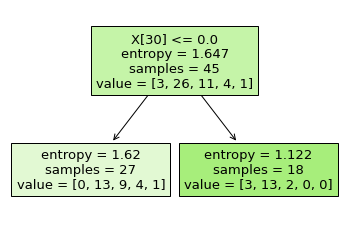

In [8]:
max_score = max(score_list)
print(max_score)
max_score_index = score_list.index(max(score_list))
clf_to_plot = clf_list[max_score_index]
tree.plot_tree(clf_to_plot, filled = True)

In [9]:
#the depth that avoids overfitting is 2 in this case

Text(0.5, 1.0, 'Performace Under Varying depth Values')

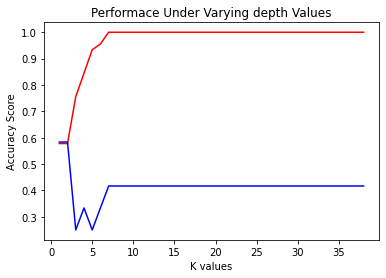

In [10]:
plt.plot(depths,train_scores, color='red',label='Training Accuracy')
plt.plot(depths,test_scores, color='blue',label='Testing Accuracy')
plt.xlabel('K values')
plt.ylabel('Accuracy Score')
plt.title('Performace Under Varying depth Values')

Text(0, 0.5, 'Mean squared error')

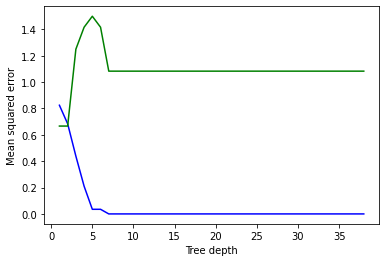

In [11]:
plt.plot(max_depths, training_error, color='blue', label='Training error')
plt.plot(max_depths, testing_error, color='green', label='Testing error')
plt.xlabel('Tree depth')
plt.ylabel('Mean squared error')

In [12]:
import graphviz 
from sklearn import tree
dot_data = tree.export_graphviz(clf_to_plot) 
graph = graphviz.Source(dot_data) 

In [13]:
graph.render()

'Source.gv.pdf'